In [87]:
library(ggplot2)
library(repr)
library(abind)
options(repr.plot.width=5, repr.plot.height=4)
rm(list=ls())

In [88]:
N <- 8
T <- 50000

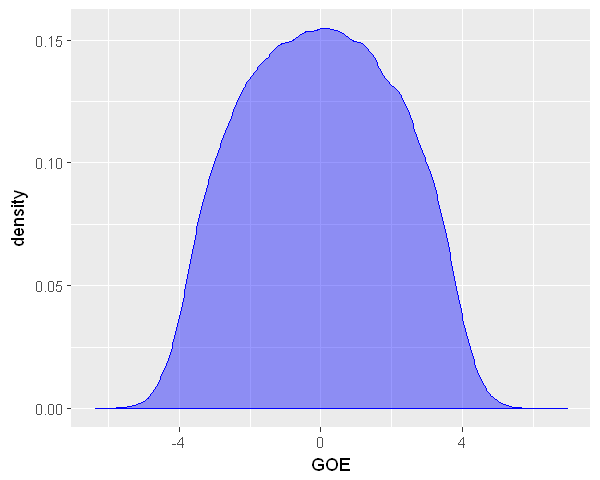

In [89]:
# Gaussian Orthogonal Ensemble
H <- array(rnorm(N^2*T), dim=c(N,N,T))
GOE <- as.numeric(apply(H, 3, FUN=function(x) eigen((x+t(x))/2)$values))

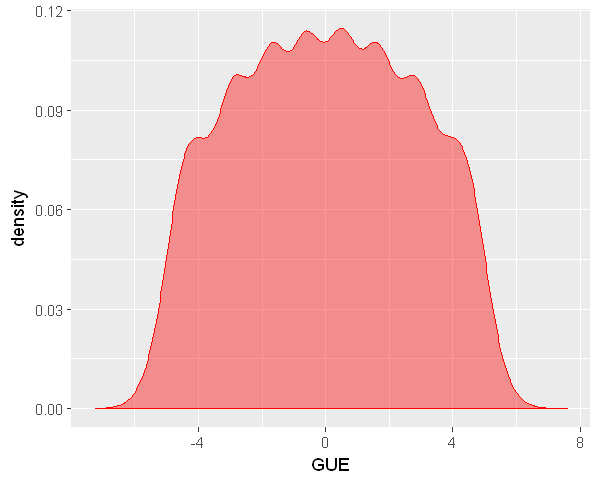

In [90]:
# Gaussian Unitary Ensemble
H <- array(rnorm(N^2*T)+rnorm(N^2*T)*1i, dim=c(N,N,T))
GUE <- as.numeric(apply(H, 3, FUN=function(x) eigen((x+Conj(t(x)))/2)$values))

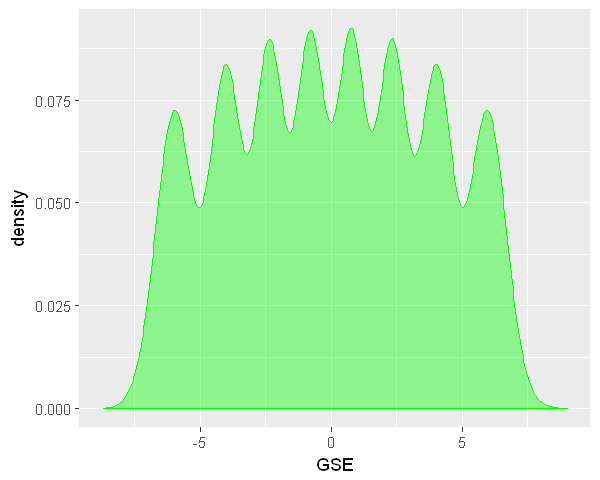

In [91]:
# Gaussian Symplectic Ensemble
A <- array(rnorm(N^2*T)+rnorm(N^2*T)*1i, dim=c(N,N,T))
B <- array(rnorm(N^2*T)+rnorm(N^2*T)*1i, dim=c(N,N,T))
H <- abind(x=abind(x=A,y=B,along=2), y=abind(x=-Conj(B),y=Conj(A),along=2), along=1)
dimnames(H) <- NULL
GSE <- as.numeric(apply(H, 3, FUN=function(x) eigen((x+Conj(t(x)))/2)$values))

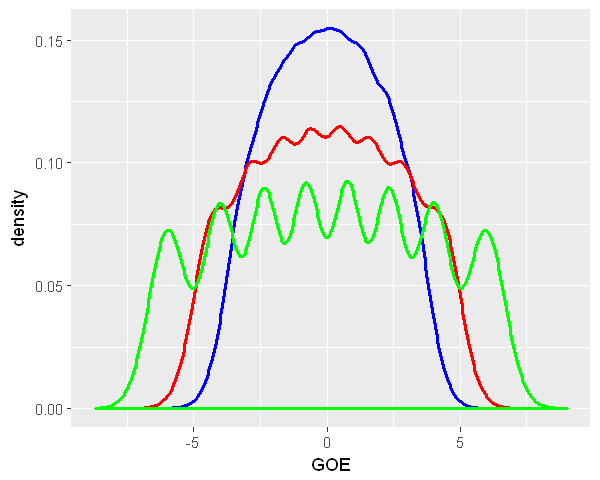

In [97]:
# Graph
ggplot() +
    geom_density(aes(x=GOE), color='blue', alpha=0.4, size=1) +
    geom_density(aes(x=GUE), color='red', alpha=0.4, size=1) +
    geom_density(aes(x=GSE), color='green', alpha=0.4, size=1)